# Task 1 - energy gap in function of lambda

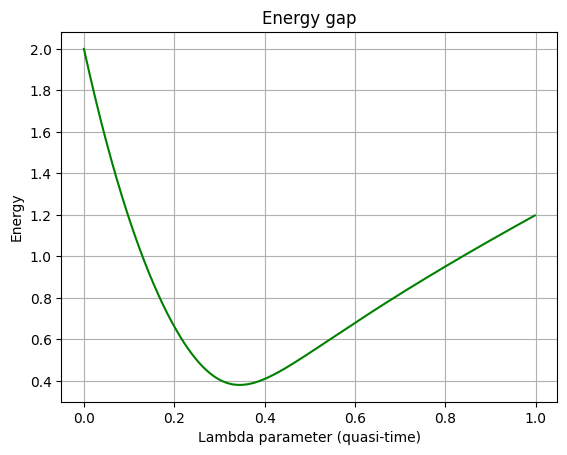

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# spin operators

s_z = np.array([[1,0],[0,-1]])
s_x = np.array([[0,1],[1,0]])
id = np.eye(2)

def tensor(a, b, c):
    return np.kron(a, np.kron(b, c))

s_z_1 = tensor(s_z, id, id)
s_z_2 = tensor(id, s_z, id)
s_z_3 = tensor(id, id, s_z)

s_x_1 = tensor(s_x, id, id)
s_x_2 = tensor(id, s_x, id)
s_x_3 = tensor(id, id, s_x)

# constants

h_1 = 0.6
h_2 = 0
h_3 = 0

J_12 = -1.1
J_13 = -2.1
J_23 = -3.8

# hamiltonians and energy gap

H_0 = -s_x_1 - s_x_2 - s_x_3
H_1 = - h_1*s_z_1 - h_2*s_z_2 - h_3*s_z_3 - J_12*(np.matmul(s_z_1, s_z_2) + np.matmul(s_z_2, s_z_1)) - J_13*(np.matmul(s_z_1, s_z_3) + np.matmul(s_z_3, s_z_1)) - J_23*(np.matmul(s_z_3, s_z_2) + np.matmul(s_z_2, s_z_3)) 

def hamiltonian(k):
    return (1-k)*H_0 + k*H_1

def energy_gap(matrix):
    values, vectors = np.linalg.eig(matrix)
    values.sort()
    return values[1] - values[0]

def energy_gap_vec(k):
    return energy_gap(hamiltonian(k))

energy_gap_vec = np.vectorize(energy_gap_vec)

# simulation of energy gap

points_num = 500
line = np.linspace(0, 1, points_num, endpoint = False)

gaps = energy_gap_vec(line)

plt.plot(line, gaps, color = "green")
plt.title("Energy gap")
plt.ylabel("Energy")
plt.xlabel("Lambda parameter (quasi-time)")
plt.grid()
plt.show()

# Task 1 - optimal running time

In [32]:
time = 0
for g in gaps:
    time += 1/(g**2)*(1/points_num)

print("Optimal running time of AQC is {} of some mysterious time units.".format(round(time,3)))

Optimal running time of AQC is 2.461 of some mysterious time units.
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -0. -0. -0.]
 [ 0.  0.  0.  0. -0. -1. -0. -0.]
 [ 0.  0.  0.  0. -0. -0. -1. -0.]
 [ 0.  0.  0.  0. -0. -0. -0. -1.]]


# Task 1 - expected energy of ground states

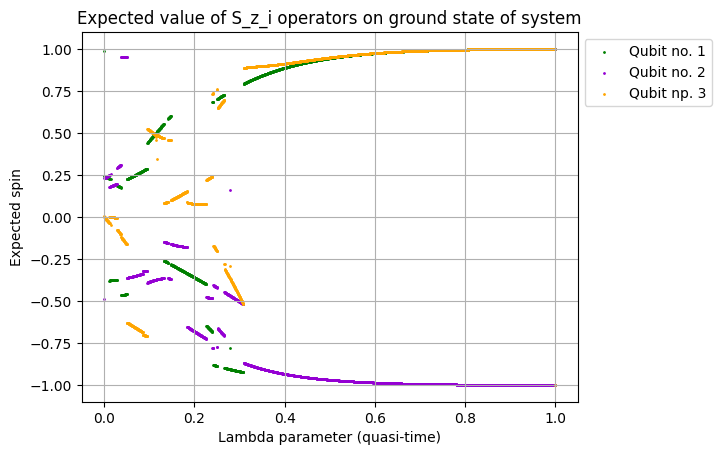

In [55]:
def ground_state(k):

    matrix = hamiltonian(k)
    values, vectors = np.linalg.eig(matrix)
    min = values[0]
    idx = 0
    for i in range(len(values)):
        if values[i] < min:
            idx = i
            min = values[i]
    return vectors[idx]

def exp_value(k, operator):
    a = np.matmul(ground_state(k), operator)
    return np.matmul(a, ground_state(k))

line = np.linspace(0, 1, 2000, endpoint = False)

line_1 = []
line_2 = []
line_3 = []

for l in line:
    line_1.append(exp_value(l, s_z_1))
    line_2.append(exp_value(l, s_z_2))
    line_3.append(exp_value(l, s_z_3))

plt.scatter(line, line_1, color = "green", s = 1)
plt.scatter(line, line_2, color = "darkviolet", s = 1)
plt.scatter(line, line_3, color = "orange", s = 1)
plt.grid()
plt.xlabel("Lambda parameter (quasi-time)")
plt.ylabel("Expected spin")
plt.title("Expected value of S_z_i operators on ground state of system")
plt.legend(["Qubit no. 1", "Qubit no. 2", "Qubit np. 3"], bbox_to_anchor = [1,1])
plt.show()